In [1]:
#Criando os clusters
#Importando bibliotecas
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import plotly.graph_objects as go

In [3]:
#Carregando os dados
dataset = pd.read_parquet("TMDB_movie_dataset_v11_tratado2.parquet")

In [5]:
#onehotencoding
def onehotencoding(df, colunas):
    a_clusterizar = ['id', 'title']
    
    for coluna in colunas:
        a_clusterizar.append(coluna)

    dataset_cluster = df[a_clusterizar].copy()
    dataset_cluster_bin = pd.DataFrame()
    for colunaa in a_clusterizar[2:]:
        dataset_coluna = pd.DataFrame()
        valores = dataset_cluster[colunaa].str.split(', ').explode().unique()
        valores = valores[:len(valores)]
        for valor in valores:
            dataset_coluna[valor] = dataset_cluster[colunaa].apply(lambda x: 1 if valor in x else 0)
        dataset_cluster_bin = pd.concat([dataset_cluster_bin, dataset_coluna], axis = 1) 
    return dataset_cluster, dataset_cluster_bin

In [31]:
#elbowmethod
def elbowmethod(tabela_binaria):
    #Lista para preencher com a série de wcss
    wcss = []

    #Preenchendo a lista
    for k in range(1, 11):
        km = KModes(n_clusters=k, init='random', n_init=10, verbose=1, max_iter = 100, cat_dissim = jaccard_dissim_binary, random_state = 42)
        km.fit(tabela_binaria)
        wcss.append(km.cost_)
        
    #Criando o gráfico com a Plotly para demonstrar o resultado do Elbow Method
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=list(range(1, 11)),
        y=wcss,
        mode='lines+markers',
        name='WCSS',
        line=dict(color='royalblue', dash='dash'),
        marker=dict(size=8)
    ))
    
    fig.update_layout(
        title='Elbow Method',
        xaxis_title='Número de Clusters (k)',
        yaxis_title='WCSS',
        xaxis=dict(tickmode='linear', tick0=1, dtick=1),
        template='plotly_white'
    )
    
    return fig

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 2143863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run

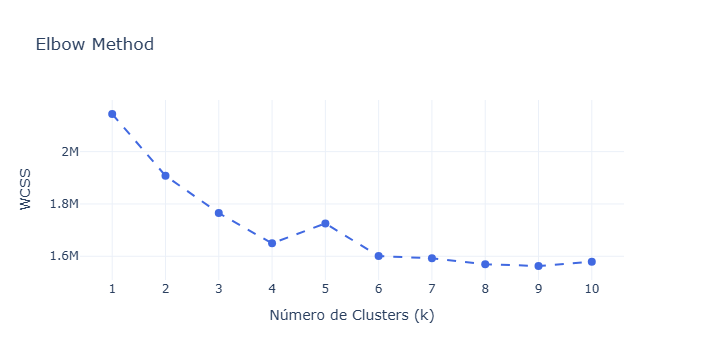

In [33]:
#Clusterização sobre os gêneros dos filmes
#Criando a tabela binária através do onehotencoding
tb_generos, tb_generos_bin = onehotencoding(dataset, ['genres'])

#Aplicando o elbowmethod
serie_wcss = elbowmethod(tb_generos_bin)
serie_wcss.show()

In [9]:
#Criando os clusters com o valor ideal de k
clusters_generos = KModes(n_clusters=6, init='random', n_init=10, verbose=2, max_iter = 100, cat_dissim = jaccard_dissim_binary, random_state = 42)
clusters_generos.fit(tb_generos_bin)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 142071, cost: 1773211.0
Run 1, iteration: 2/100, moves: 14, cost: 1773204.0
Run 1, iteration: 3/100, moves: 0, cost: 1773204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 121626, cost: 1957735.0
Run 2, iteration: 2/100, moves: 9, cost: 1957728.0
Run 2, iteration: 3/100, moves: 0, cost: 1957728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 115120, cost: 1760388.0
Run 3, iteration: 2/100, moves: 11, cost: 1760381.0
Run 3, iteration: 3/100, moves: 0, cost: 1760381.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23244, cost: 1907429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 51507, cost: 1853907.0
Run 5, iterati

KModes(init='Huang', n_clusters=6, random_state=42, verbose=1)

In [17]:
tb_generos['cluster'] = clusters_generos.labels_

In [21]:
#Exibindo o dataframe resultante
tb_generos.head(10)

,id,title,genres,Action,Science Fiction,Adventure,Drama,Crime,Thriller,Fantasy,...,War,Animation,Family,Horror,Music,History,TV Movie,Documentary,nulo,cluster
0,27205,Inception,"Action, Science Fiction, Adventure",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,157336,Interstellar,"Adventure, Drama, Science Fiction",0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,155,The Dark Knight,"Drama, Action, Crime, Thriller",1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
3,19995,Avatar,"Action, Adventure, Fantasy, Science Fiction",1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,24428,The Avengers,"Science Fiction, Action, Adventure",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,293660,Deadpool,"Action, Adventure, Comedy",1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,299536,Avengers: Infinity War,"Adventure, Action, Science Fiction",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,550,Fight Club,Drama,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,118340,Guardians of the Galaxy,"Action, Science Fiction, Adventure",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,680,Pulp Fiction,"Thriller, Crime",0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Aplicando a clusterização usando as colunas categóricas
#Criando a tabela binária
tb, tb_bin = onehotencoding(dataset, ['genres', 'spoken_languages', 'production_countries', 'keywords', 'production_companies'])

#Aplicando o método do cotovelo
serie_wcss = elbowmethod(tb_bin)
serie_wcss.show()

In [ ]:
#Criando os clusters com o valor ideal de k
clusters_categoricos = KModes(n_clusters=6, init='random', n_init=10, verbose=2, max_iter = 100, cat_dissim = jaccard_dissim_binary, random_state = 42)
clusters_categoricos.fit(tb_bin)

In [ ]:
#Exibindo o dataframe resultante
tb['cluster'] = clusters_categoricos.labels_
tb.head(10)